In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv.crdownload to creditcard.csv.crdownload


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/creditcard.csv.crdownload")  # Change filename if needed
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print("Missing values:\n")
print(df.isnull().sum())


Missing values:

Time                0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Class               0
NormalizedAmount    0
dtype: int64


In [ ]:
# 'Class' = 0 → Genuine, 1 → Fraud
genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print(f"Genuine transactions: {len(genuine)}")
print(f"Fraud transactions: {len(fraud)}")
print(f"Percentage of fraud: {round(len(fraud) / len(df) * 100, 2)}%")


Genuine transactions: 11615
Fraud transactions: 49
Percentage of fraud: 0.42%


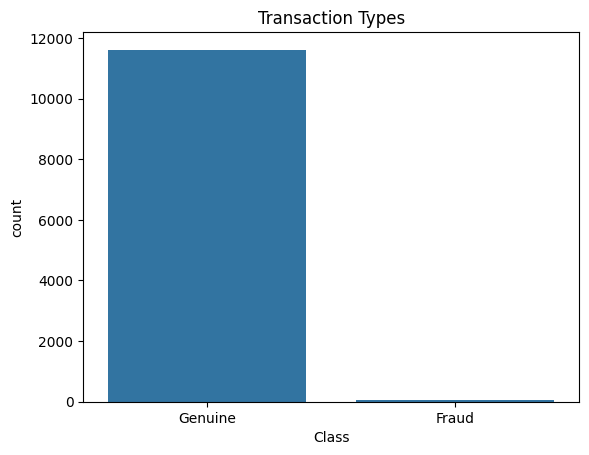

In [ ]:
sns.countplot(x='Class', data=df)
plt.xticks([0, 1], ['Genuine', 'Fraud'])
plt.title("Transaction Types")
plt.show()


In [ ]:
# Drop 'Time' and 'Class' columns
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X = df.drop(['Class', 'Time'], axis=1)  # 'Time' is often not useful
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [ ]:
dt_acc = accuracy_score(y_test, dt_predictions)
rf_acc = accuracy_score(y_test, rf_predictions)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Decision Tree Accuracy: 0.9989
Random Forest Accuracy: 0.9991


In [ ]:
print("Decision Tree Performance:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

print("Random Forest Performance:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Decision Tree Performance:
[[3482    2]
 [   2   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.88      0.88      0.88        16

    accuracy                           1.00      3500
   macro avg       0.94      0.94      0.94      3500
weighted avg       1.00      1.00      1.00      3500

Random Forest Performance:
[[3483    1]
 [   2   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500

